
# Load Data set

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./Data/auto-mpg.csv")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18,NaN,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,na,8.0,350.0,165,3693,11.5,70,1,buick skylark 320
2,18,8.0,318.0,150,3436,11.0,70,1,plymouth satellite
3,16,8.0,304.0,150,3433,12.0,70,1,amc rebel sst
4,17,8.0,302.0,140,3449,10.5,70,1,ford torino


# Preprocess the dataset

In [5]:
import numpy as np

In [6]:
df.replace(['na', '?'], np.nan, inplace=True)

In [7]:
df['mpg'] = pd.to_numeric(df['mpg'], errors='coerce')
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce')
df['displacement'] = pd.to_numeric(df['displacement'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
df['acceleration'] = pd.to_numeric(df['acceleration'], errors='coerce')
df['model year'] = pd.to_numeric(df['model year'], errors='coerce')
df['origin'] = pd.to_numeric(df['origin'], errors='coerce')

In [8]:
df.isnull().sum()

mpg             1
cylinders       1
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [9]:
df['mpg'].fillna(df['mpg'].median(), inplace=True)
df['cylinders'].fillna(df['cylinders'].median(), inplace=True)
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

In [10]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

# Draw Graphs

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Set the style for the plots
sns.set(style="whitegrid")

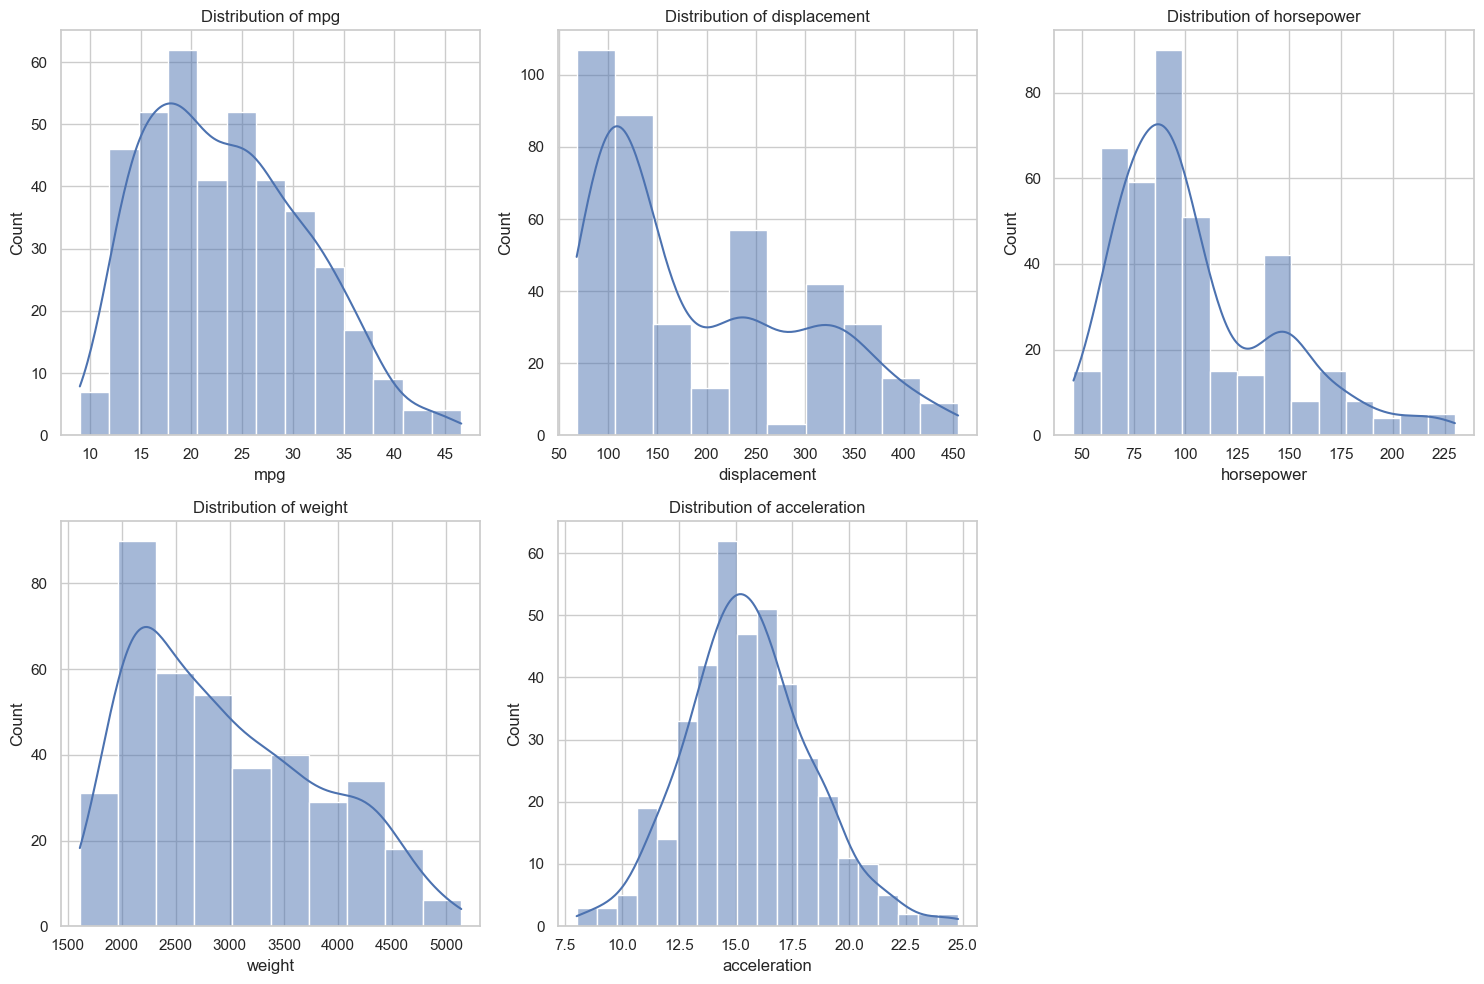

In [15]:
# 1. Distribution of Continuous Variables using Histogram
continuous_vars = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']

plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

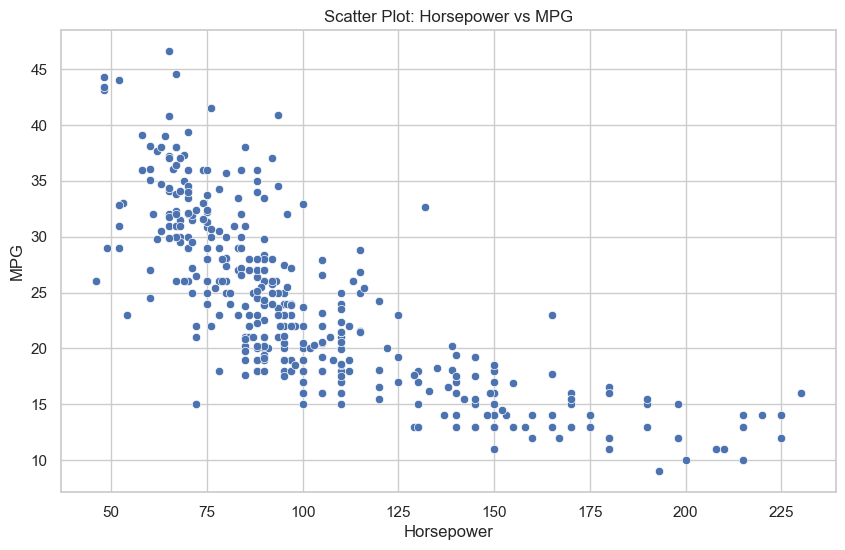

In [16]:
# 2. Relationship between Two Continuous Variables using Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.title('Scatter Plot: Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

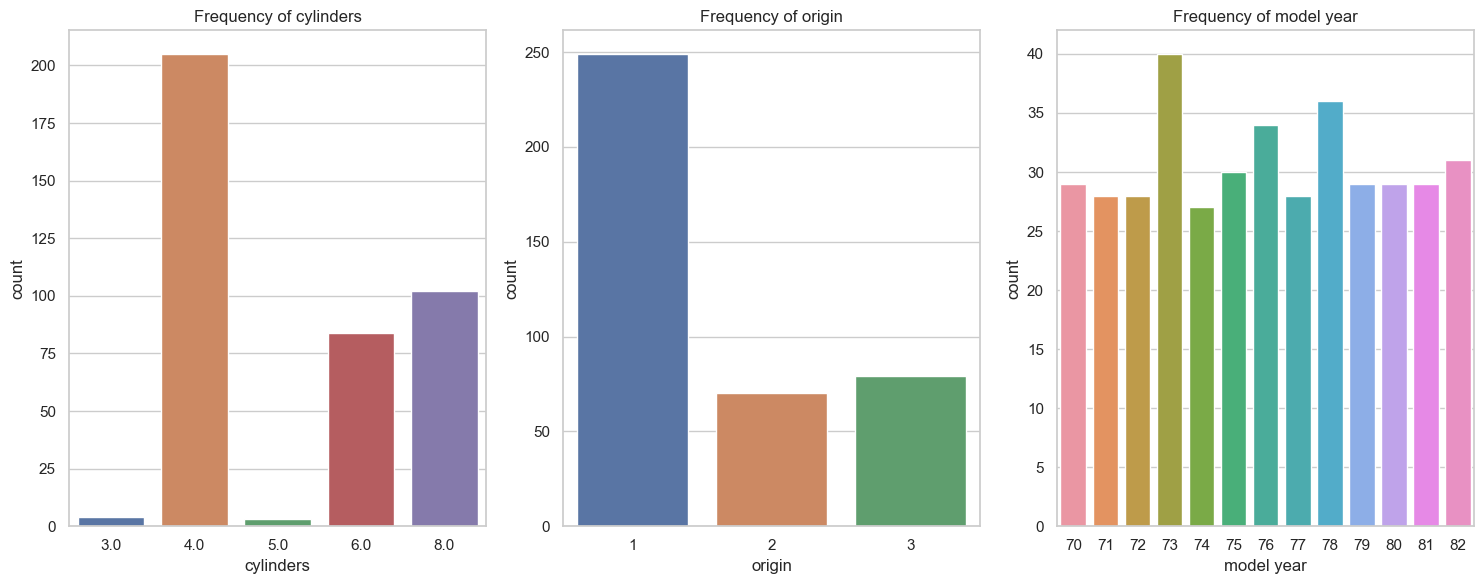

In [17]:
# 3. Frequency of Categorical Values using Count Plot
categorical_vars = ['cylinders', 'origin', 'model year']

plt.figure(figsize=(15, 6))
for i, var in enumerate(categorical_vars):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=var, data=df)
    plt.title(f'Frequency of {var}')
plt.tight_layout()
plt.show()

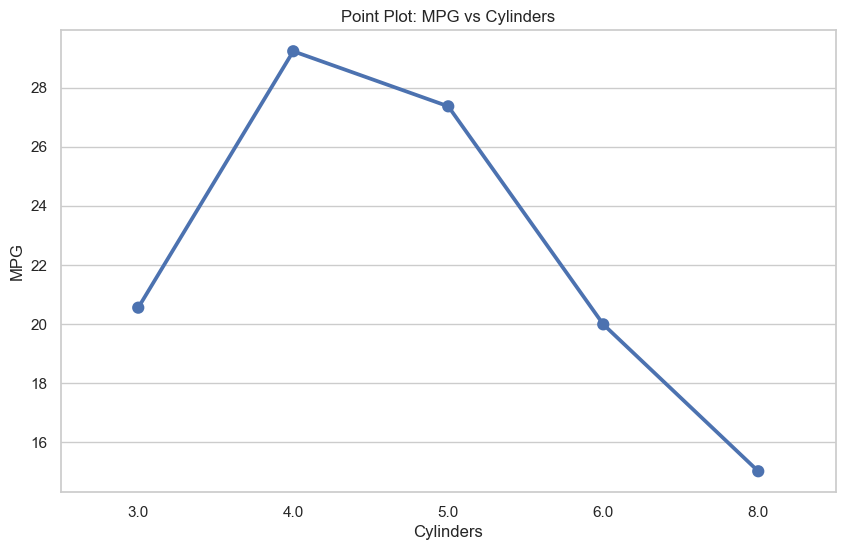

In [19]:
# 4. Point Plots for One Continuous and One Categorical Variable
plt.figure(figsize=(10, 6))
sns.pointplot(x='cylinders', y='mpg', data=df, errorbar=None)
plt.title('Point Plot: MPG vs Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.show()